# Discovering the Mysteries of Music 
## The Data Set:
I will be using the `Spotify Tracks Genre` Dataset from [Kaggle](https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset/code). 
The data consists of a comprehensive list of audio tracks from over 125 different genres that was collected from Spotify using an API by the owner of the dataset. 
The data consists of the following attributes: 
* artists: artists name
* album_name: title of the album that the track belongs to. 
* track_name: name of the song
* popularity: A score form 0-100 indicating the popularity of the song
* duration_ms: the duration of each song in milliseconds. 
* explicit: a boolean value indicating whether the song is explicit or not
* Danceability: a score form 0-1 indicating how danceable the song is. The higher the danceability score, the more energetic and rhytmic a song is. 
* Energy: a score from 0-1 indicating how fast past a song is. 
* loudness: measured in decibels, positive valeus are lowder songs.
* Key: Number from 0-11 assigning keys to the tracks using pitch class notation as follows: 
        0 = C, 1 = C♯/D♭, 2 = D, 3 = D♯/E♭, 4 = E, 5 = F, 6 = F♯/G♭, 7 = G, 8 = G♯/A♭, 9 = A, 10 = A♯/B♭, 11 = B
* Mode: The tonal model of the track. 0 for minor and 1 for major.
* Speechines: a score from 0-1 that represents the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more * positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
* time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
* track_genre: The genre in which the track belongs

In [3]:
import piplite
await piplite.install(['pandas', 'numpy', 'seaborn', 'matplotlib', 'scikit-learn', 'plotly','openpyxl', 'nbformat>=4.2.0', 'scipy', 'statsmodels'])

In [4]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [6]:
import js
from io import StringIO

In [7]:
op = js.self.indexedDB.open("JupyterLite Storage")


In [8]:
idbdb = op.result



In [9]:
tr = idbdb.transaction("files")
obs = tr.objectStore("files")
req = obs.get("train.csv", "key")

In [10]:
csv = req.result.content
csv_io = StringIO(csv)
data = pd.read_csv(csv_io)

In [11]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Data Exploration:
### Data Cleaning: 
Let's Understand the dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

We can see that out of 114000 different songs, there are a couple songs that have null values for the artist name, the album name, and the track name. For our analysis, we do not really need those variables since we are going to look at the actual content of the song. Hence, let us take a look at what columns we can remove from the data set to make it more compact. 

We will check for null values.

In [13]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

We can see that we have one song that has null values for the artist name, the track name, and the album name. The question here is wehther we remove this song or keep it for our analysis. The answer to this question depends on whether we are keeping those three columns or removing them for our analysis. 

In [14]:
len(data.artists.unique())

31438

In [15]:
len(data.album_name.unique())

46590

In [16]:
len(data.track_name.unique())


73609

In [17]:
len(data.track_id.unique())


89741

Since these categorical varaibles have multiple unique values, they do not add any real value to our eventual model. Hence, we can drop them. 

In [18]:
df = data.copy() 
#save the original dataframe just in case we need to go back to it. 

In [19]:
data.drop(['artists', 'album_name', 'track_name', 'track_id'], axis = 1, inplace = True)
data.head()

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


We can also remove the "Unnamed: 0" Column because that adds 0 value to the dataset. 

In [20]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [21]:
# check for any null values after removal:
data.isnull().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

There are no null values so we are good to move on to the next step. 

### Feature Encoding:
Let us take a look at some of the categorical variables. 
The categorical variables are: key, mode, time_signature, track_genre, and explicit. 
Let us now further expore these variables. 
One thing to note is that even though python lists these variables as integers/float, the original description of the data allows us to recognize that these variables are infact categories and need to be treated as such. 

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non-null  object 
dtypes: bool(1), float64(

We see that the explicit category is a boolean value. Right now since we are simply exploring the data it may not seem like a big deal. However, when we have to actually use the data in regression analysis, we would need to convert this value to an integer.
Nect, we will convert the boolean category to a numerical one. 

In [23]:
data['explicit'] = data['explicit'].astype(int) 
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Let us use one hot encoding to categorize the genre variable. 
This step will be useful in future regression analysis. 

In [24]:
data1 = pd.get_dummies(data = data, columns = ['track_genre'])
data1.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,False,False,False,False,False,False,False,False,False,False
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,False,False,False,False,False,False,False,False,False,False
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,False,False,False,False,False,False,False,False,False,False
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,False,False,False,False,False,False,False,False,False,False
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,False,False,False,False,False,False,False,False,False,False


### Data Exploration:
Let's now take a look at some relationships between varaibles, distributions of different variables, as well as understanding what variables seem the most interesting. 

### Categorical Variables:
let's look at some frequency distributions for categorical variables.
The data setmakes more sense if we look at certain variables within a certain genre. 
For example: What key is most used in Hip Hop Music?

In [25]:
data["track_genre"].value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

Let's determine the most popular genre

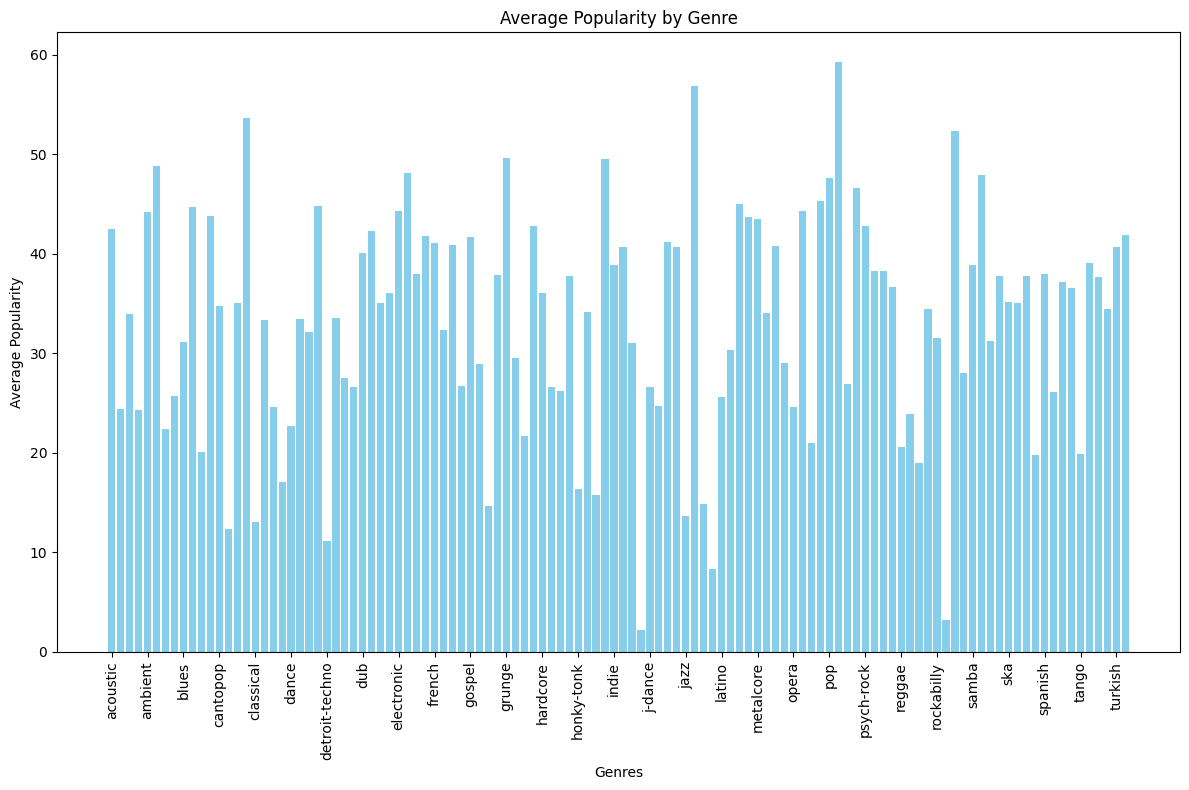

In [26]:
# Group by 'genres' and calculate the average popularity
genre_popularity = data.groupby('track_genre')['popularity'].mean().reset_index()

# Create a bar graph
plt.figure(figsize=(12, 8))  # Increased figure size
plt.bar(genre_popularity['track_genre'], genre_popularity['popularity'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')

# Display every 2nd genre label to reduce clutter
plt.xticks(ticks=range(0, len(genre_popularity['track_genre']), 4), 
           labels=genre_popularity['track_genre'][::4], rotation=90, ha='center')  

plt.tight_layout()
plt.show()

In [27]:
data['track_genre'].unique().tolist()

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop-film',
 'pop',
 'power-pop',
 'progressive

Based on our histogram, we can see that the most popular genre is power-pop and the least popular Genre is Iranian music.

Let's compare the most popular music with the lest popular music. 
To do this, let us first determine a cutoff for music popularity. 


In [29]:
data['popularity'].describe()

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

Ideally, 50 would be the threshold above which music can be considered popular. However, that is not the case. The popularity scores are not evenly distributed. The most popular genre, power-pop, has an average popularity level of about 60. Hence, we need to determine a popularity threshold according to this uneven distribution. Based on our summary statistics, the middle ground is about 33.24, and the 50% mark seems to be at a popularity score of 35. 
Thus, let's use 35 as our popularity threshold. 

In [30]:
data.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Now we are going to subset the data as follows. 
Songs with a popularity of 35 and up will be labeled as popular and sogns with a popularity of < 35 will be labeled as unpopular. 

In [31]:
data['popularity_score'] = data['popularity'].apply(lambda x: 'popular' if x >= 35 else 'unpopular')

In [32]:
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_score
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,popular
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,popular
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,popular
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,popular
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,popular


Let's look at the distributionof popular versus unpopular songs. 

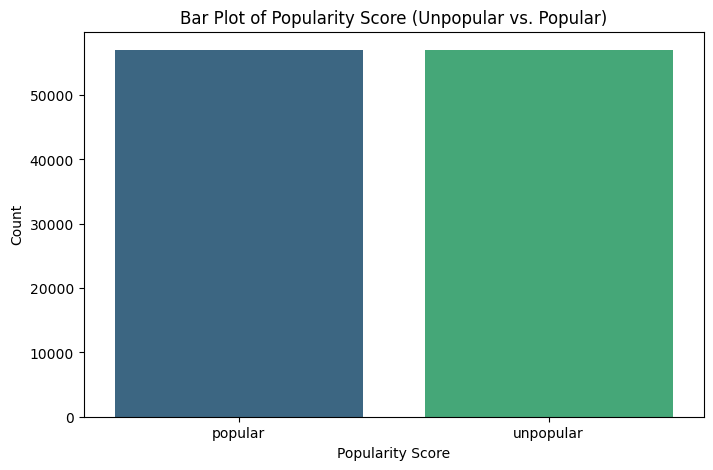

In [34]:
# Count values of 'popular' and 'unpopular'
popularity_counts = data['popularity_score'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=popularity_counts.index, y=popularity_counts.values, palette='viridis')
plt.xlabel('Popularity Score')
plt.ylabel('Count')
plt.title('Bar Plot of Popularity Score (Unpopular vs. Popular)')
plt.show()

This looks cool. There is an equal number of popular and unpopular songs.
Now, we can move on. 

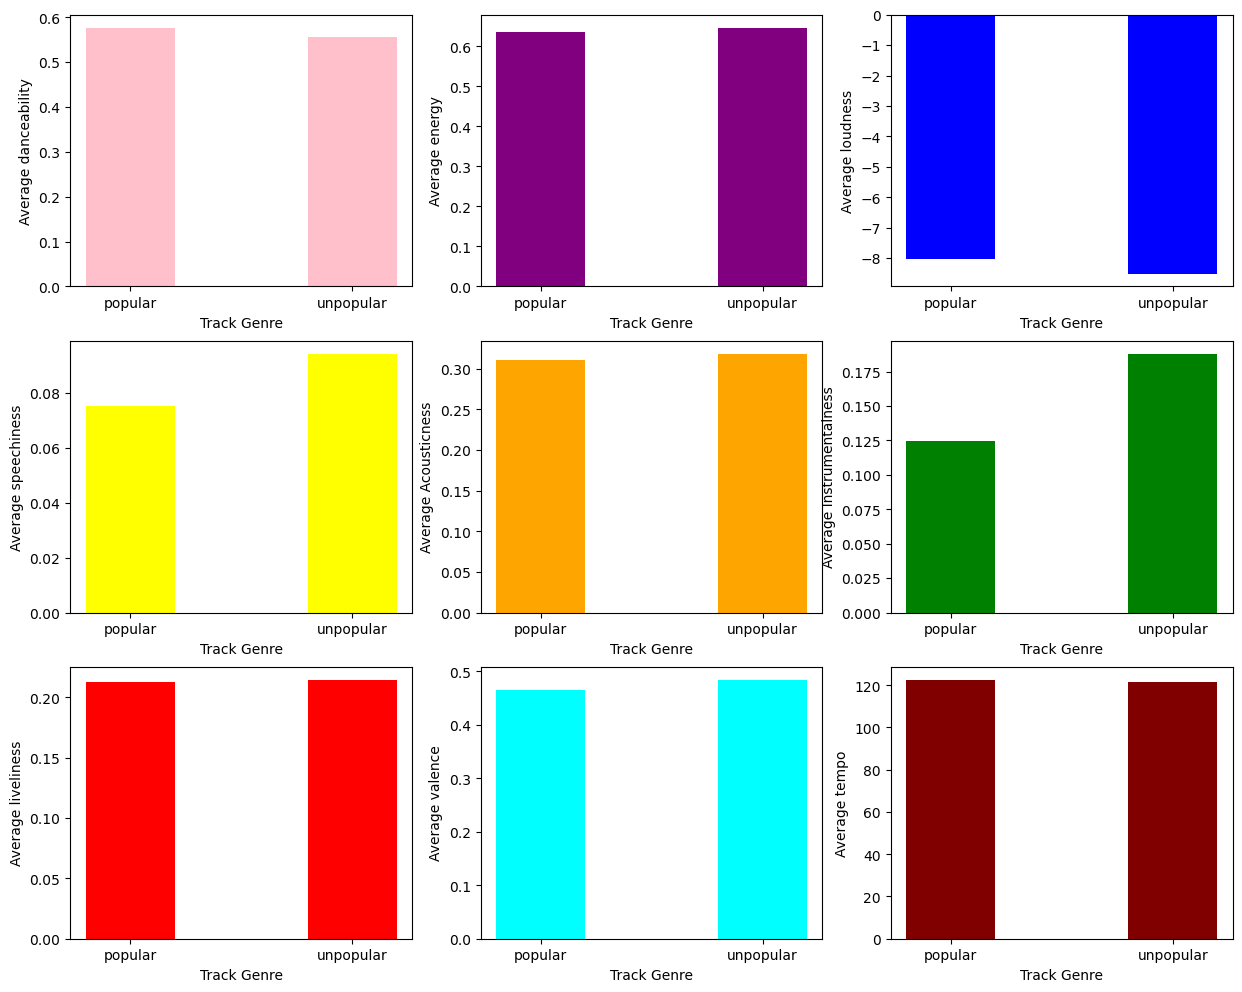

In [33]:
# Create a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # 3 rows, 3 columns

# Grouping by 'track_genre' and calculating the mean of 'danceability'
genre_danceability = data.groupby('popularity_score')['danceability'].mean()
genre_danceability
# Plotting the bar chart
plt.subplot(3,3,1)
plt.bar(genre_danceability.index, genre_danceability, color='pink', width=0.4)
plt.xlabel('Track Genre')
plt.ylabel('Average danceability')


# Grouping by 'track_genre' and calculating the mean of 'energy'
genre_energy = data.groupby('popularity_score')['energy'].mean()
genre_energy
# Plotting the bar chart
plt.subplot(3,3,2)
plt.bar(genre_energy.index, genre_energy, color='purple', width=0.4)
plt.xlabel('Track Genre')
plt.ylabel('Average energy')  

# Grouping by 'track_genre' and calculating the mean of 'loudness'
genre_loudness = data.groupby('popularity_score')['loudness'].mean()
genre_loudness
# Plotting the bar chart
plt.subplot(3,3,3)
plt.bar(genre_loudness.index, genre_loudness, color='blue', width=0.4)
plt.xlabel('Track Genre')
plt.ylabel('Average loudness') 


# Grouping by 'track_genre' and calculating the mean of 'speechiness'
genre_speechiness = data.groupby('popularity_score')['speechiness'].mean()
genre_speechiness
# Plotting the bar chart
plt.subplot(3,3,4)
plt.bar(genre_speechiness.index, genre_speechiness, color='yellow', width=0.4)
plt.xlabel('Track Genre')
plt.ylabel('Average speechiness') 

# Grouping by 'track_genre' and calculating the mean of 'acousticness'
genre_acousticness = data.groupby('popularity_score')['acousticness'].mean()
genre_acousticness
# Plotting the bar chart
plt.subplot(3,3,5)
plt.bar(genre_acousticness.index, genre_acousticness, color='orange', width=0.4)
plt.xlabel('Track Genre')
plt.ylabel('Average Acousticness') 

# Grouping by 'track_genre' and calculating the mean of 'instrumentalness'
genre_instrumentalness = data.groupby('popularity_score')['instrumentalness'].mean()
genre_instrumentalness
# Plotting the bar chart
plt.subplot(3,3,6)
plt.bar(genre_instrumentalness.index, genre_instrumentalness, color='green', width=0.4)
plt.xlabel('Track Genre')
plt.ylabel('Average Instrumentalness') 

# Grouping by 'track_genre' and calculating the mean of 'liveness'
genre_liveness = data.groupby('popularity_score')['liveness'].mean()
genre_liveness
# Plotting the bar chart
plt.subplot(3,3,7)
plt.bar(genre_liveness.index, genre_liveness, color='red', width=0.4)
plt.xlabel('Track Genre')
plt.ylabel('Average liveliness') 

# Grouping by 'track_genre' and calculating the mean of 'valence'
genre_valence = data.groupby('popularity_score')['valence'].mean()
genre_valence
# Plotting the bar chart
plt.subplot(3,3,8)
plt.bar(genre_valence.index, genre_valence, color='cyan', width=0.4)
plt.xlabel('Track Genre')
plt.ylabel('Average valence') 

# Grouping by 'track_genre' and calculating the mean of 'tempo'
genre_tempo = data.groupby('popularity_score')['tempo'].mean()
genre_tempo
# Plotting the bar chart
plt.subplot(3,3,9)
plt.bar(genre_tempo.index, genre_tempo, color='maroon', width=0.4)
plt.xlabel('Track Genre')
plt.ylabel('Average tempo') 

plt.show()




Looking at these graphs, the differences between popular and unpopular songs does not seem to be too much. 
However we can say that certain aspects seem to be more popular. For example, poplar songs seem to have the following characteristics: higher danceability, not too loud, less speechiness, less acousticness, less instrumentalness, less valence, higher tempo. 
Because these differences do not seem significant based on the graphs, we can test some of our ideas through hypothesis testing. 

### Hypothesis Testing:

1. The energy of a song does not effect the popularity.
    In other words, the energy between Unpopular music and popular is the same.
   We have the following hypothesis:
       $ 𝐻_{0}:\mu_{1}=\mu_{2} $ The mean energy levels of popular music is the same as the mean energy levels of unpopular.
       $ 𝐻_{A}:\mu_{1} < \mu_{2} $ The mean energy levels of popular music is greater than or not equal to the energy levels of unpopular Music.

2. The danceability of a song does effect the popularity. That is, a song with a higher danceability score will be more popular.
    We have the following hypothesis:
   $ 𝐻_{0}:\mu_{1}=\mu_{2} $ The mean danceability levels of popular music is the same as the mean energy levels of unpopular Music.
   $ 𝐻_{A}:\mu_{1} > \mu_{2} $ The mean danceability levels of popular music is greater than or not equal to the energy levels of unpopular Music.

3. The tempo of a song does not effect its popularity. 
     We have the following hypothesis:
   $ 𝐻_{0}:\mu_{1}=\mu_{2} $ The mean tempo of unpopular is the same as the mean tempo of popular music. 
   $ 𝐻_{A}: $ The mean tempo of popular music does not equal the tempo on unpopular music.


let's use an alpha value of 0.05

First, let's get all observations for popular and unpopular songs using Loc. 

In [37]:
popular=data.loc[data.popularity_score=="popular"]
unpopular=data.loc[data.popularity_score=="unpopular"]

1. Now we are going to test our first hypothesis.
   First, let's look at the distributions of the energy levels across popularity and obtain the average energy levels for unpopular and popular songs. 

In [38]:
popular_energy = popular.energy
unpopular_energy = unpopular.energy

<AxesSubplot:xlabel='energy', ylabel='Density'>

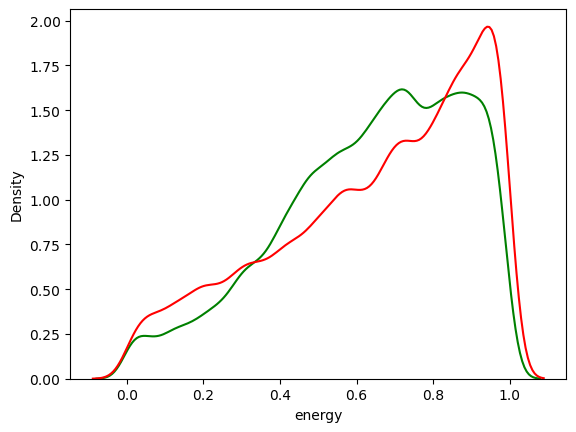

In [39]:
sns.distplot(popular_energy,color='green',hist=False)
sns.distplot(unpopular_energy,color='red',hist=False)

Based on the graph alone we can't really tell which subsetion of songs have a higher energy level. Further, the distributions are completely different and non normal. 
Let's explore even further by look at a boxplot. 

[Text(0.5, 1.0, ' Energy vs Popularity')]

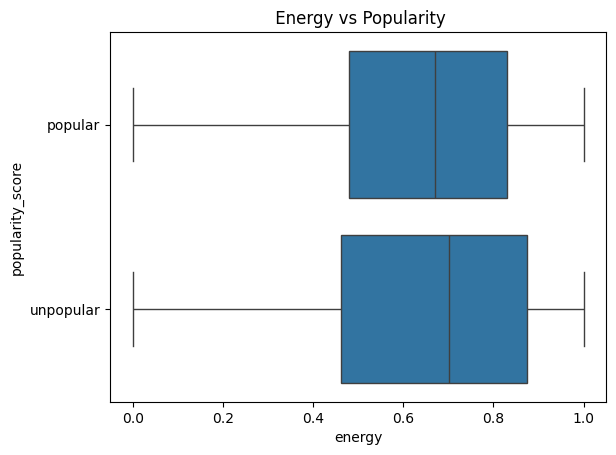

In [40]:
sns.boxplot(x=data.energy,y=data.popularity_score,data=data).set(title=" Energy vs Popularity")

Since our two samples are non normal and we do not know the population variance, the safest test for us to use will be the Welch's T test. 

In [46]:
from scipy.stats import ttest_ind

# Perform Welch's t-test (unpaired, unequal variances)
stat, p_value = ttest_ind(popular_energy, unpopular_energy, equal_var=False)

print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: -7.2360534067863505, p-value: 4.648582003598818e-13


Since our p value is less than the alpha of 0.05, we can reject the null hypothesis and say that energy levels do effect the popularity of a song. That is songs with a higher energy level are less popular than songs with a lower energy level. 

*This is an interesting outcome because I would have expected the opposite.*

2. Let's now move on to our second hypothesis. 

In [47]:
popular_danceability = popular.danceability
unpopular_danceability = unpopular.danceability

<AxesSubplot:xlabel='danceability', ylabel='Density'>

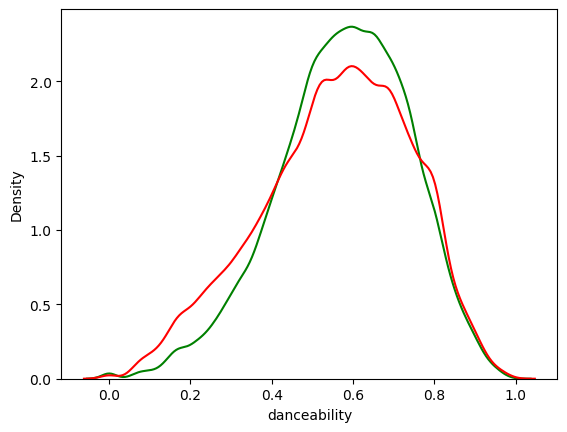

In [49]:
sns.distplot(popular_danceability,color='green',hist=False)
sns.distplot(unpopular_danceability,color='red',hist=False)

These distributions seem pretty normal so we can use a t-test. 

In [51]:
t_val1, p_value1 = stats.ttest_ind(popular_danceability, unpopular_danceability)
p_value_onetail=p_value1/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val1, p_value1, p_value_onetail))

t_value = 19.405499624338148 , p_value =9.472610366886739e-84 , p_value_onetail = 4.736305183443369e-84


Since the p value is less than our alpha value of 0.05, we can reject the null hypothesis and say that the average danceabiity of popular songs is greater than the average danceability of unpopular songs. 

3. Finally, we are now going to look at our third hypothesis.  

In [52]:
popular_tempo = popular.tempo
unpopular_tempo = unpopular.tempo

<AxesSubplot:xlabel='tempo', ylabel='Density'>

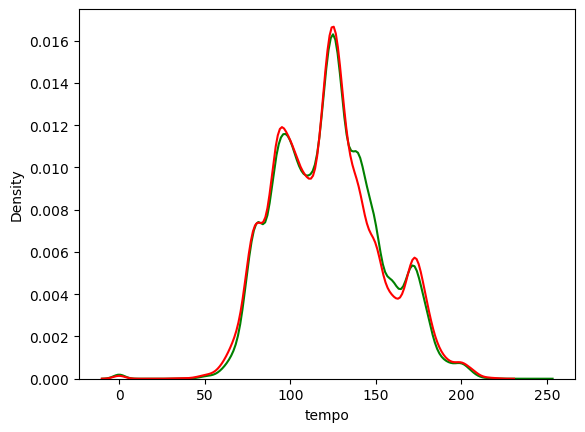

In [53]:
sns.distplot(popular_tempo,color='green',hist=False)
sns.distplot(unpopular_tempo,color='red',hist=False)

In [59]:
print(popular_tempo.mean())
print(unpopular_tempo.mean())

122.52963449630761
121.76591949606079


Let's use a t test for this since n> 30. 

In [54]:
t_value2, p_value2 = stats.ttest_ind(popular_tempo, unpopular_tempo)
print("t_value2 = ",t_value2, ", p_value2 = ", p_value2)

t_value2 =  4.3011200880967255 , p_value2 =  1.7007804629648017e-05


As we can see, the p value is significantly less than our alpha value of 0.05, so we can reject the null hypothesis and conclude that there is a difference between the average tempo of popular and unpopular songs. 

*This is interesting since it does not seem like there is a difference between tempos from first glance.*

### Next Steps:
Now that we have explored the data and its features a little, out next steps would be to conduct feature selection. Since we have mostly focused on what makes a song popular. We can select popularity as our numerical target variable and conduct a regression analysis to determine popularity numbers of various songs. This can then help us further determine feature importance and how certain correlations may effect the popularity determination of songs. 